# ロジスティック回帰分析
review の文章から悪い評価なのか良い評価なのかを判定しよう

In [15]:
%matplotlib inline
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [19]:
# source: "https://archive.ics.uci.edu/ml/machine-learning-databases/00331/"

# csvではなくただのテキストデータのため、review と is_positive を表す部分に分割する。
def reviews_split_index(text):
    index_list = []
    for i, letter in enumerate(text):
        if letter == '0' or letter == '1':
            index_list.append(i)
    return max(index_list)

amazon_reviews = []
with open("./source/amazon_cells_labelled.txt", "r",encoding="utf-8") as f:
    for row in f:
        row = row
        i = reviews_split_index(row)
        review = row[:i].strip('\t')
        is_positive = row[i]
        amazon_reviews.append([review, is_positive])
    

In [20]:
# データフレームの作成
df = pd.DataFrame(amazon_reviews, columns=["review", "is_positive"])
df.head()

,review,is_positive
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [21]:
# 特徴行列にするテキスト
text = df['review']

# reviewを空白で区切りで分割し特徴行列を作成する
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer='word')
X = cv.fit_transform(text)

In [22]:
# 特徴行列の中身の確認(単語数が多すぎてよくわからない)
pd.DataFrame(X.toarray(), columns=cv.get_feature_names())

/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,10,100,11,12,13,15,15g,18,20,2000,...,wrongly,year,years,yell,yes,yet,you,your,z500a,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# 目的変数の取得
y = df['is_positive']

In [24]:
from sklearn.model_selection import train_test_split
# トレーニングデータとテストデータに分割
(X_train, X_test, y_train, y_test) = train_test_split(
    X,y,test_size=0.3, random_state=0
)

In [25]:
# モデルの選択
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1, random_state=0, solver='liblinear')

In [26]:
# 学習
lr.fit(X_train, y_train)

LogisticRegression(C=1, random_state=0, solver='liblinear')

In [27]:
# スコアの表示
lr.score(X_test,y_test)

0.7933333333333333

In [28]:
# ロジスティック回帰分析の結果
a = lr.coef_
b = lr.intercept_  
print("回帰係数:", a) 
print("切片:", b)
print("決定係数:", lr.score(X_test, y_test))

回帰係数: [[ 0.53705703  0.20326654  0.         ... -0.24014274  0.
  -0.05441331]]
切片: [-0.27844197]
決定係数: 0.7933333333333333


In [29]:
# csvファイルで確認
np.savetxt('Regression_Coeefficient', a)

In [30]:
# 回帰係数をリストとして取得
Regression_Coefficient = a.tolist()[0]

/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


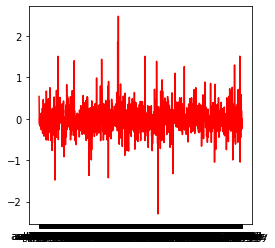

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
# 回帰係数を図で見る

plt.figure(figsize=(4,4))
plt.plot(cv.get_feature_names(),Regression_Coefficient, color='red')

plt.show()


In [32]:
# 図を見てもよくわからなので回帰係数の最大値付近や最小値付近の単語を確認する。
# まず、回帰係数と単語をセットにしたデータフレームを作成する

df3 = pd.DataFrame(list(zip(cv.get_feature_names(),Regression_Coefficient)), columns=['word', 'Regression_Coefficient'])
df3.head(), df3.tail()

/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(  word  Regression_Coefficient
 0   10                0.537057
 1  100                0.203267
 2   11                0.000000
 3   12               -0.059367
 4   13               -0.140830,
        word  Regression_Coefficient
 1842    yet                0.063904
 1843    you               -0.247525
 1844   your               -0.240143
 1845  z500a                0.000000
 1846   zero               -0.054413)

In [33]:
# describe
df3.describe()

,Regression_Coefficient
count,1847.000000
mean,-0.010039
std,0.280583
min,-2.298901
25%,-0.135304
50%,0.000000
75%,0.095390
max,2.475013


In [34]:
# 回帰係数で昇順にsort
sorted_df3 = df3.sort_values('Regression_Coefficient')
sorted_df3

,word,Regression_Coefficient
1081,not,-2.298901
144,bad,-1.480806
630,first,-1.426949
454,disappointed,-1.369101
1219,poor,-1.326834
...,...,...
172,best,1.507332
964,love,1.508305
1826,works,1.510184
715,good,1.851915


In [35]:
# 回帰係数が0付近の確認
sorted_df3[
    abs(sorted_df3['Regression_Coefficient']) < 0.001
]

,word,Regression_Coefficient
1608,theory,-0.000951
551,ergonomic,-0.000951
1525,stand,-0.000951
231,buyit,-0.000749
169,below,-0.000317
...,...,...
128,attractive,0.000000
15,350,0.000503
862,jabra350,0.000503
1075,noise,0.000819


# 結果
`not,bat,first,disappointed,poor`などの単語は回帰係数がマイナスの中で絶対値大きいtop5である。<br>
`great,good,works,love,beast`などの単語は回帰系数がプラスの中で絶対値が大きいtop5である。<br>
`cancellatioin,noise,attractive,cancellation` などの単語は回帰係数が0に近い。

# 考察
`not,bat,first,disappointed,poor`のような回帰係数の最小値周辺の単語は、マイナスの意見のレビューが多く
`great,good,works,love,beast`のような回帰係数の最大値周辺の単語は、プラスの意見のレビューが多く
しかし回帰係数が0に近い`cancellatioin,noise,attractive,cancellation`などの単語を見ると、現実ではマイナスの意味を持つような単語やプラスの意味を持つような単語もあるように感じる。

# 課題
今回の特徴量は単純に出現頻度によるベクトルかをしたが、出現数の多い単語のベクトルが異常に強くなってしまう欠点があるようである。しかし、言語処理にはTF-IDF(索引語頻度逆文書頻度)という手法があるようで、この手法を用いることでその欠点を補うことができるようである。<br>
また、自然言語は単語一つで意味をもつものではなく、熟語がるように組み合わさって意味をなすものもある。こうしたものをどう処理するのか、またどのように自然言語を処理していくのかを学習していこうと思う。

ロジスティック回帰だけでなく他のモデルを利用した方法でも試す必要がる。